In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, neighbors
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import joblib
from joblib import dump, load
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

[9 0 0 ... 3 0 5]


c:\Users\charl\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])
probability_model(x_test[:5])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7649 - loss: 0.6780
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8534 - loss: 0.4021
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8650 - loss: 0.3705
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8728 - loss: 0.3509
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8785 - loss: 0.3263
313/313 - 1s - 3ms/step - accuracy: 0.8638 - loss: 0.3703


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.56076086e-05, 4.33978755e-08, 7.63327819e-07, 6.20594165e-07,
        2.21080981e-07, 3.56181599e-02, 7.17299417e-06, 4.50845659e-02,
        2.34907493e-04, 9.19007957e-01],
       [2.08518140e-05, 6.04959117e-13, 9.99160886e-01, 2.55529731e-09,
        2.41347327e-04, 2.25169154e-11, 5.76918130e-04, 5.30445714e-17,
        1.79506976e-09, 1.47491888e-15],
       [5.47601644e-07, 9.99999285e-01, 6.27051078e-09, 1.05767960e-07,
        1.28575923e-08, 3.52658712e-13, 8.05290390e-10, 8.36087859e-18,
        2.65857247e-09, 2.31986781e-15],
       [9.48957961e-08, 9.99996185e-01, 7.00946323e-09, 3.63593290e-06,
        4.24189821e-08, 1.92157271e-13, 7.15739523e-10, 5.80765369e-18,
        3.14271609e-09, 1.07146585e-14],
       [2.49140158e-01, 3.56927535e-06, 1.98663071e-01, 4.50627413e-03,
        1.07434373e-02, 2.78922671e-04, 5.29591858e-01, 3.73986927e-06,
        7.04410626e-03, 2.49207569e-05]], dtype=float32)>

In [6]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8638 - loss: 0.3703

Test accuracy: 0.8637999892234802


In [7]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[4.5607609e-05 4.3397876e-08 7.6332782e-07 ... 4.5084566e-02
  2.3490749e-04 9.1900796e-01]
 [2.0851814e-05 6.0495912e-13 9.9916089e-01 ... 5.3044571e-17
  1.7950698e-09 1.4749189e-15]
 [5.4760164e-07 9.9999928e-01 6.2705108e-09 ... 8.3608786e-18
  2.6585725e-09 2.3198678e-15]
 ...
 [2.0490220e-06 3.3716887e-11 8.0923195e-07 ... 1.6701819e-07
  9.9999380e-01 8.3673979e-12]
 [9.6115286e-08 9.9995160e-01 6.0919318e-09 ... 5.2634161e-13
  1.8034582e-07 1.6822915e-10]
 [6.7973859e-04 5.5275018e-06 4.3677702e-04 ... 9.7829923e-03
  5.7307882e-03 2.6263177e-04]]


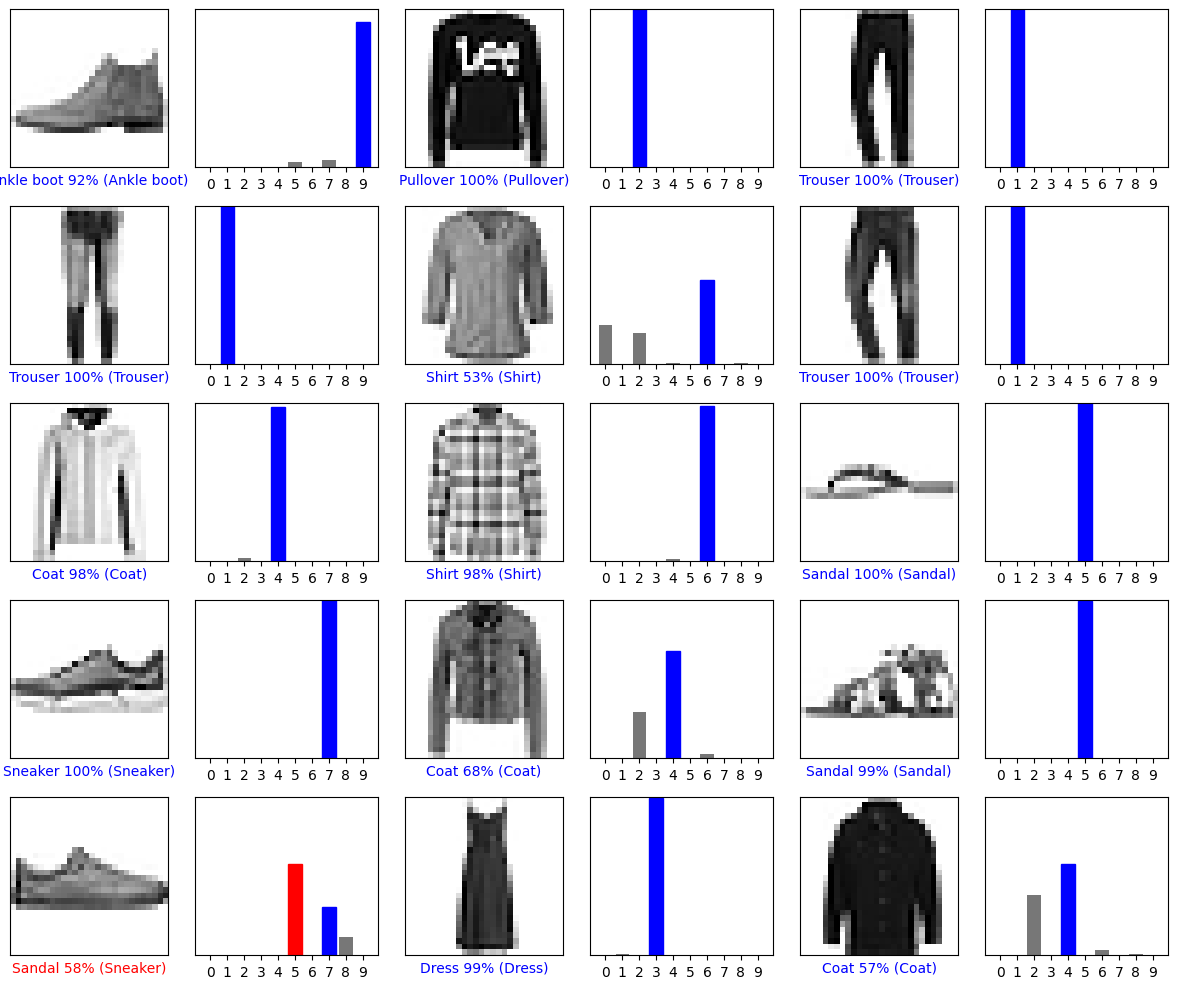

In [9]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

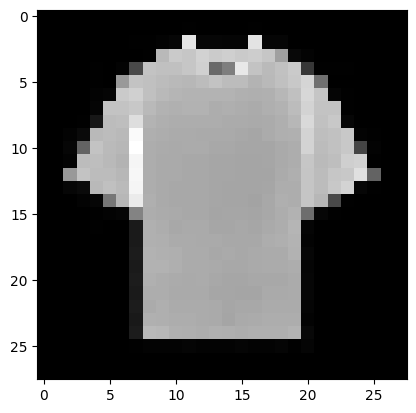

In [10]:
%matplotlib inline
tshirt=cv2.imread("t-shirt.jpg",0)
tshirt=cv2.resize(tshirt,(28,28))
tshirt=cv2.bitwise_not(tshirt)
plt.imshow(tshirt,cmap="grey")


(1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


TypeError: list indices must be integers or slices, not str

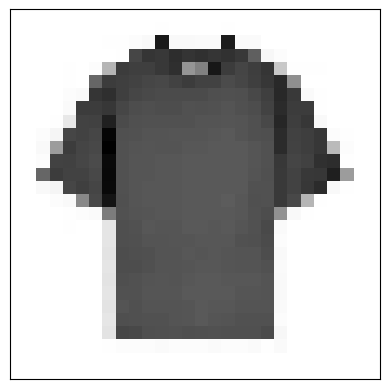

In [ ]:
tshirt2=np.array([tshirt])
print(tshirt2.shape)
predictions = probability_model.predict(tshirt2)
plot_image(0, predictions[0], 0, tshirt2)